In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import scipy.signal as sp

In [2]:

Sens1=pd.read_csv(open("C:/Users/nicol/OneDrive/Área de Trabalho/Python/IC/Carac/Nic1_vazio_100g.txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1"], sep="\t")
Sens2=pd.read_csv(open("C:/Users/nicol/OneDrive/Área de Trabalho/Python/IC/Carac/Nic2_vazio_100g.txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS2"], sep="\t")
Sens3=pd.read_csv(open("C:/Users/nicol/OneDrive/Área de Trabalho/Python/IC/Carac/Nic3_vazio_100g.txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS3"], sep="\t")
Sens5=pd.read_csv(open("C:/Users/nicol/OneDrive/Área de Trabalho/Python/IC/Carac/Nic5_vazio_100g.txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS3","PEAKS5"], sep="\t")
Sens6=pd.read_csv(open("C:/Users/nicol/OneDrive/Área de Trabalho/Python/IC/Carac/Nic6_vazio_100g.txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS6"], sep="\t")
Sens7=pd.read_csv(open("C:/Users/nicol/OneDrive/Área de Trabalho/Python/IC/Carac/Nic7_vazio_100g.txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS6","PEAKS7"], sep="\t")
Sens8=pd.read_csv(open("C:/Users/nicol/OneDrive/Área de Trabalho/Python/IC/Carac/Nic8_vazio_100g.txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS6","PEAKS7","PEAKS8"], sep="\t")

In [3]:
#FILTRANDO OS DATAFRAMES E TROCANDO , POR . 

sen1=Sens1.drop(["CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8"],axis=1)
sen1["PEAKS1"]=sen1["PEAKS1"].apply (lambda x: x.replace(",",".")).astype(np.float64);

sen2=Sens2.drop(["CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8"],axis=1)
sen2["PEAKS2"]=sen2["PEAKS2"].apply (lambda x: x.replace(",",".")).astype(np.float64)

sen3=Sens3.drop(["CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8"],axis=1)
sen3["PEAKS3"]=sen3["PEAKS3"].apply (lambda x: x.replace(",",".")).astype(np.float64)

sen5=Sens5.drop(["CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS3"],axis=1)
sen5["PEAKS5"]=sen5["PEAKS5"].apply (lambda x: x.replace(",",".")).astype(np.float64)

sen6=Sens6.drop(["CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8"],axis=1)
sen6["PEAKS6"]=sen6["PEAKS6"].apply (lambda x: x.replace(",",".")).astype(np.float64)

sen7=Sens7.drop(["CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS6"],axis=1)
sen7["PEAKS7"]=sen7["PEAKS7"].apply (lambda x: x.replace(",",".")).astype(np.float64)

sen8=Sens8.drop(["CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS6","PEAKS7"],axis=1)
sen8["PEAKS8"]=sen8["PEAKS8"].apply (lambda x: x.replace(",",".")).astype(np.float64)

In [4]:
sen3

,Timestamp,PEAKS3
0,15/05/2023 14:04:44.00978,1545.33462
1,15/05/2023 14:04:44.01078,1545.33442
2,15/05/2023 14:04:44.01178,1545.33559
3,15/05/2023 14:04:44.01278,1545.33481
4,15/05/2023 14:04:44.01378,1545.33171
...,...,...
40427,15/05/2023 14:05:24.43678,1545.35555
40428,15/05/2023 14:05:24.43778,1545.34974
40429,15/05/2023 14:05:24.43878,1545.35051
40430,15/05/2023 14:05:24.43978,1545.35012


In [5]:
pico1=sen1["PEAKS1"]
sen1["tempo (ms)"]=[x for x in range (0,len(pico1))]

pico2=sen2["PEAKS2"]
sen2["tempo (ms)"]=[x for x in range (0,len(pico2))]


pico3=sen3["PEAKS3"]
sen3["tempo (ms)"]=[x for x in range (0,len(pico3))]

pico5=sen5["PEAKS5"]
sen5["tempo (ms)"]=[x for x in range (0,len(pico5))]

pico6=sen6["PEAKS6"]
sen6["tempo (ms)"]=[x for x in range (0,len(pico6))]

pico7=sen7["PEAKS7"]
sen7["tempo (ms)"]=[x for x in range (0,len(pico7))]

pico8=sen8["PEAKS8"]
sen8["tempo (ms)"]=[x for x in range (0,len(pico8))]



In [6]:
#Tem bastante espaço pra otimizar, talvez por vetores? Facilita otimização 

numgrps=10000

sensep1=np.array_split(sen1,numgrps)

sensep2=np.array_split(sen2,numgrps)

sensep3=np.array_split(sen3,numgrps)

sensep5=np.array_split(sen5,numgrps)

sensep6=np.array_split(sen6,numgrps)

sensep7=np.array_split(sen7,numgrps)

sensep8=np.array_split(sen8,numgrps)


In [7]:
medias1=[]
medias2=[]
medias3=[]
medias5=[]
medias6=[]
medias7=[]
medias8=[]


for i in range (0, len(sensep1)):
    medias1.append(sensep1[i]["PEAKS1"].mean())
    
    
for i in range (0, len(sensep2)):
    medias2.append(sensep2[i]["PEAKS2"].mean())
    
    
for i in range (0, len(sensep3)):
    medias3.append(sensep3[i]["PEAKS3"].mean())
    
    
for i in range (0, len(sensep5)):
    medias5.append(sensep5[i]["PEAKS5"].mean())
    
    
for i in range (0, len(sensep6)):
    medias6.append(sensep6[i]["PEAKS6"].mean())
    
    
for i in range (0, len(sensep7)):
    medias7.append(sensep7[i]["PEAKS7"].mean())
    
    
for i in range (0, len(sensep8)):
    medias8.append(sensep8[i]["PEAKS8"].mean())

In [8]:
peso=0.100*9.81
medsep1=np.array_split(medias1,2)
medsep2=np.array_split(medias2,2)
medsep3=np.array_split(medias3,2)
medsep5=np.array_split(medias5,2)
medsep6=np.array_split(medias6,2)
medsep7=np.array_split(medias7,2)
medsep8=np.array_split(medias8,2)





In [22]:
medsemcarga1=medsep1[0][4000].mean()
medsemcarga2=medsep2[0][4000].mean()
medsemcarga3=medsep3[0][4000].mean()
medsemcarga5=medsep5[0][1000:3000].mean()
medsemcarga6=medsep6[0][4000].mean()
medsemcarga7=medsep7[0][4000].mean()
medsemcarga8=medsep8[0][4000].mean()

aux1=medsep1[1][3000::].mean()
aux2=medsep2[1][3000::].mean()
aux3=medsep3[1][4500::].mean()
aux5=medsep5[1][4500::].mean()
aux6=medsep6[1][4000::].mean()
aux7=medsep7[1][4500::].mean()
aux8=medsep8[1][::].mean()

aux1= aux1-medsemcarga1
aux2= aux2-medsemcarga2
aux3= aux3-medsemcarga3
aux5= aux5-medsemcarga5
aux6= aux6-medsemcarga6
aux7= aux7-medsemcarga7
aux8= aux8-medsemcarga8



In [23]:
k1=peso/aux1
k2=peso/aux2
k3=peso/aux3
k5=peso/aux5
k6=peso/aux6
k7=peso/aux7
k8=peso/aux8


In [24]:
k=[k1,k2,k3,k5,k6,k7,k8]
k =[abs(ele) for ele in k]

print(f"os K são: {k}")

os K são: [206.80125260303313, 21.891570005033376, 52.175564125875574, 180.35019375012803, 37.276529627514556, 30.19669870953455, 21.385117085427893]


In [12]:
x1= [x for x in range(0,len(medias1))]
x2= [x for x in range(0,len(medias2))]
x3= [x for x in range(0,len(medias3))]
x5= [x for x in range(0,len(medias5))]
x6= [x for x in range(0,len(medias6))]
x7= [x for x in range(0,len(medias7))]
x8= [x for x in range(0,len(medias8))]


<Axes: title={'center': 'Sensor 7'}>

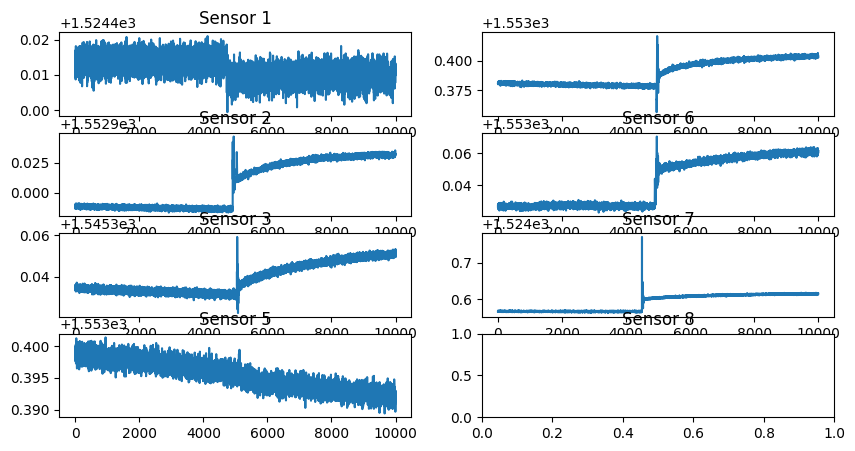

In [13]:
fig,axes= plt.subplots(4,2,figsize=(10,5))
sns.lineplot(x=x1,y=medias1,ax=axes[0,0])
axes[0,0].set_title("Sensor 1")

sns.lineplot(x=x2,y=medias2,ax=axes[1,0])
axes[1,0].set_title("Sensor 2")

sns.lineplot(x=x3,y=medias3,ax=axes[2,0])
axes[2,0].set_title("Sensor 3")

sns.lineplot(x=x5,y=medias5,ax=axes[3,0])
axes[3,0].set_title("Sensor 5")

axes[1,1].set_title("Sensor 6")
sns.lineplot(x=x6,y=medias6,ax=axes[0,1])

axes[2,1].set_title("Sensor 7")
sns.lineplot(x=x7,y=medias7,ax=axes[1,1])

axes[3,1].set_title("Sensor 8")
sns.lineplot(x=x8,y=medias8,ax=axes[2,1])